In [1]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/visual_utils.R")
source("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/k_of_SNN/explore_k.R")


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis



Attaching package: ‘igraph’


The following object is masked from ‘package:class’:

    knn


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




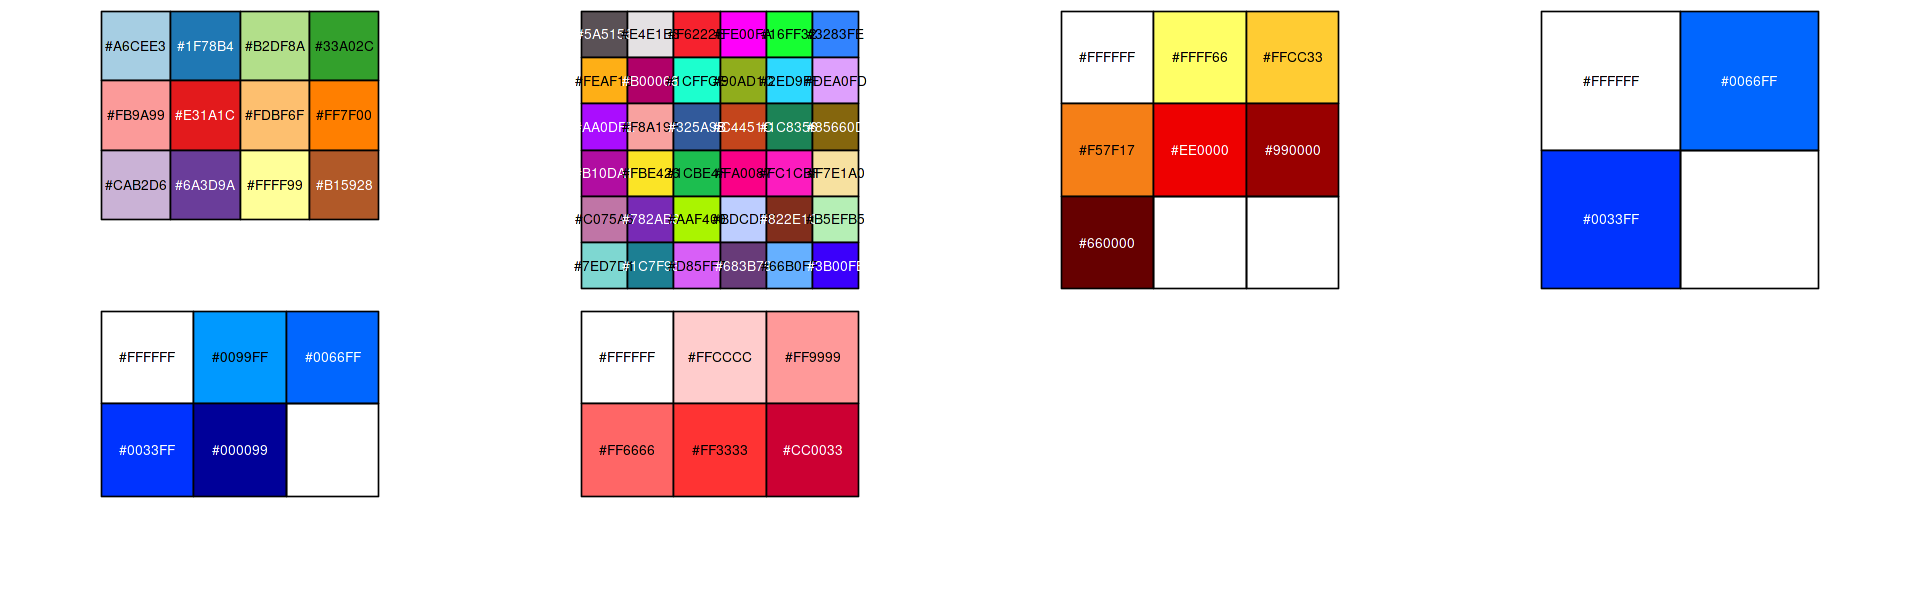

In [3]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [2]:
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line mixing experiment", "human adult atlas subset1", "human adult atlas subset2",  "Buenrostro2018", "Chen2019", "10X PBMC multiomics")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [3]:
# Put meta files of all datasets together
for(j in 1:length(dataset_ls)){
    dataset <- dataset_ls[j]
    k_optimal <- k_ls[j]
    if(j == 1){
        df <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df_metrics <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df$dataset <- dataset_name[j]
        df$dataset2 <- dataset_ls[j]
        df_metrics$dataset <- dataset_name[j]
        df$k_optimal <- k_optimal
        df_metrics$k_optimal <- k_optimal
        df_metrics$dataset2 <- dataset_ls[j]
    }else{
        df1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df1$dataset <- dataset_name[j]
        df1$k_optimal <- k_optimal
        df1$dataset2 <- dataset_ls[j]
        
        df <- rbind(df, df1)
        df_metrics1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df_metrics1$dataset <- dataset_name[j]
        df_metrics1$k_optimal <- k_optimal
        df_metrics1$dataset2 <- dataset_ls[j]
        df_metrics <- rbind(df_metrics, df_metrics1)
    }
}


In [10]:
mapping <- list("Cell line mixing experiment" = "Cell line", 
                     "human adult atlas subset1" = "Atlas1", 
                     "human adult atlas subset2" = "Atlas2",
                     "Buenrostro2018" = "Buenrostro2018",
                     "Chen2019" = "Chen2019",
                     "10X PBMC multiomics" = "10XPBMC")
mapping2 <- list("Cell line mixing experiment" = "1", 
                     "human adult atlas subset1" = "1", 
                     "human adult atlas subset2" = "1",
                     "Buenrostro2018" = "2",
                     "Chen2019" = "2",
                     "10X PBMC multiomics" = "2")
df <- df %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
df <- df %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[as.character(dataset)]))

df$dataset_short <- factor(df$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

df_metrics <- df_metrics %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
df_metrics <- df_metrics %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[as.character(dataset)]))

df_metrics$dataset_short <- factor(df_metrics$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

# Atlas1

In [70]:
j <- 2
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

## ArchR

In [71]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_peaks") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2,dataset_short,dataset_type
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<named list>
10,ARI,0.9397695,ArchR,ArchR_peaks,peaks,500,default,15,0.05,candidate1/evaluation/ArchR/peaks/500/default/15/r0.05_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.05.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
11,ARI,0.9359269,ArchR,ArchR_peaks,peaks,500,default,15,0.15,candidate1/evaluation/ArchR/peaks/500/default/15/r0.15_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.15.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
12,ARI,0.8774016,ArchR,ArchR_peaks,peaks,500,default,15,0.20,candidate1/evaluation/ArchR/peaks/500/default/15/r0.2_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.2.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
15,ARI,0.7602852,ArchR,ArchR_peaks,peaks,500,default,15,0.25,candidate1/evaluation/ArchR/peaks/500/default/15/r0.25_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.25.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
17,ARI,0.6994751,ArchR,ArchR_peaks,peaks,500,default,15,0.30,candidate1/evaluation/ArchR/peaks/500/default/15/r0.3_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.3.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
20,ARI,0.6491359,ArchR,ArchR_peaks,peaks,500,default,15,0.45,candidate1/evaluation/ArchR/peaks/500/default/15/r0.45_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.45.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
21,ARI,0.6336403,ArchR,ArchR_peaks,peaks,500,default,15,0.55,candidate1/evaluation/ArchR/peaks/500/default/15/r0.55_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.55.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
29,ARI,0.4971516,ArchR,ArchR_peaks,peaks,500,default,15,0.90,candidate1/evaluation/ArchR/peaks/500/default/15/r0.9_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.9.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1
18,ARI,0.6925630,ArchR,ArchR_peaks,peaks,500,default,15,0.40,candidate1/evaluation/ArchR/peaks/500/default/15/r0.4_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.4.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,human adult atlas subset1,13,candidate1,Atlas1,1


### Check the UMAP

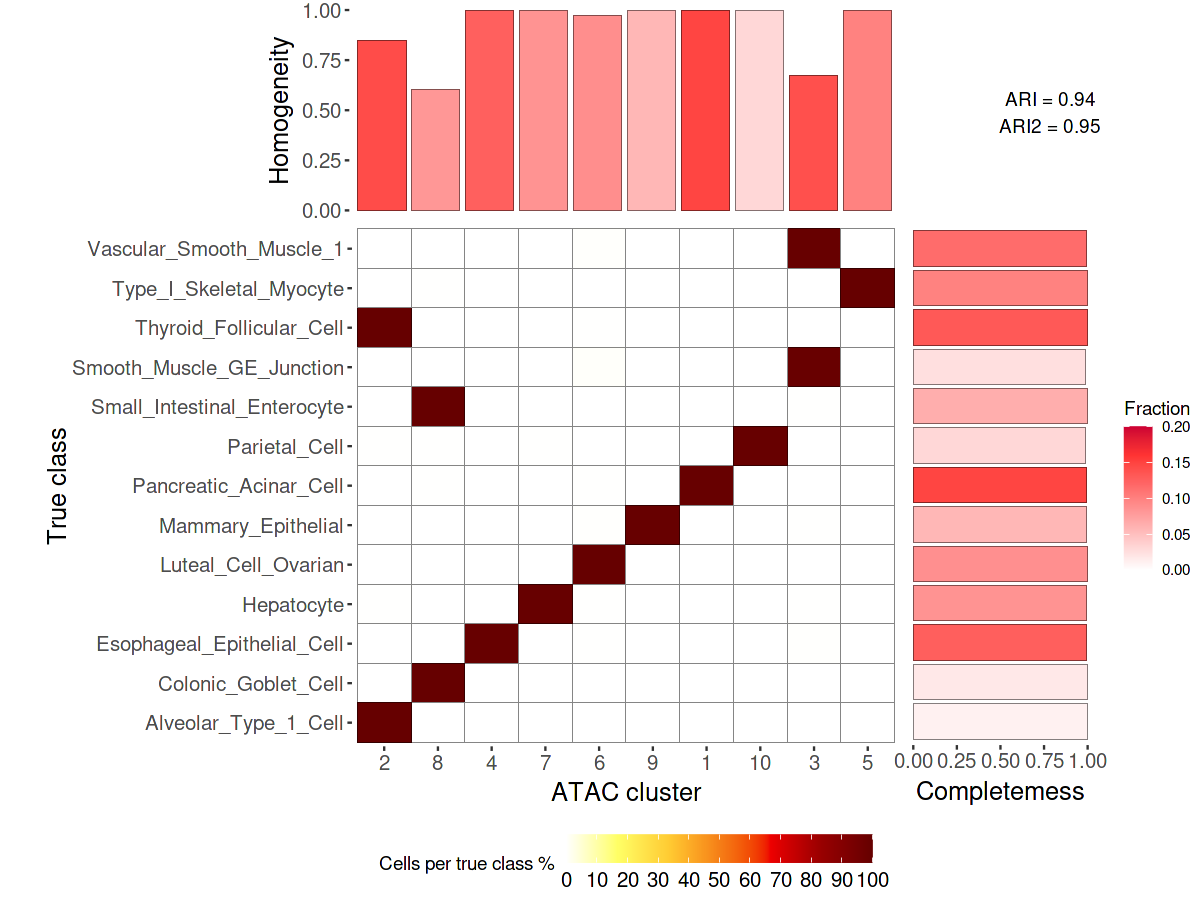

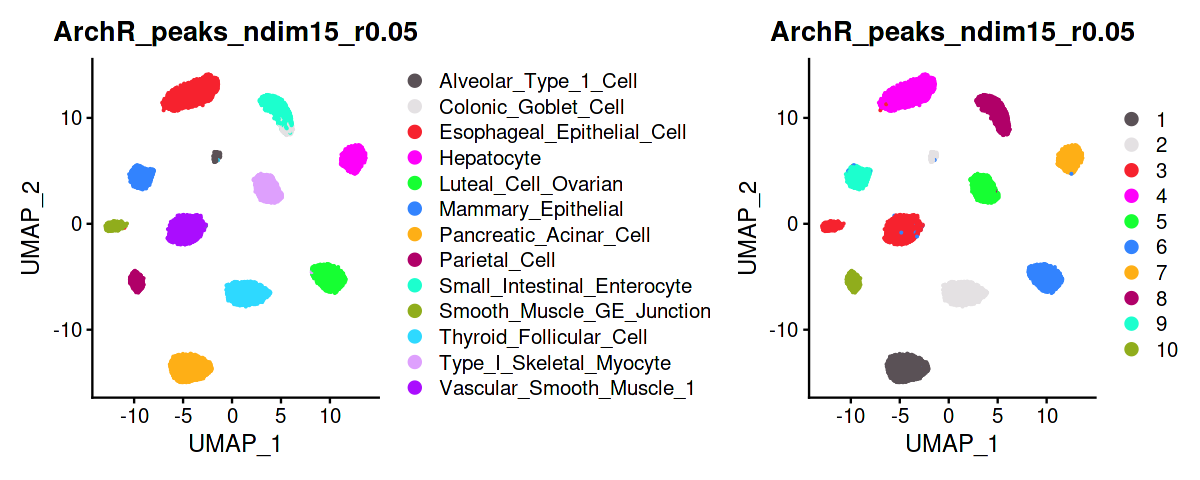

In [72]:
# check if the value of a,b,c is appropriate
i <- 1
method <- df_method$method[i]
resolution<- df_method$resolution[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)
p2 <- Seurat::DimPlot(sobj1, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_r", resolution)) 
p3 <- Seurat::DimPlot(sobj2, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_r", resolution)) 
options(repr.plot.width=10, repr.plot.height=7.5)
p1 
options(repr.plot.width=10, repr.plot.height=4)
p2 + p3

### Check the graph connectivity

In [19]:
df_metrics_selected <- df_metrics_sub[as.logical(df_metrics_sub$metric %in% c("ARI")),]
df_metrics_selected <- df_metrics_selected %>% filter(ndim == 15) %>% filter(resolution == 0.1)

In [20]:
# graph connectivity
graph_name <- paste0("snn_ndim", 15)
df_g <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c())

for(i in 1:dim(df_metrics_selected[1])){
    sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_selected$dataset2[i], "/", df_metrics_selected$snn_file[i])
    lm <- df_metrics_selected$long_method[i]
    dataset <- df_metrics_selected$dataset[i]
    sobj <- readRDS(sobj_file)
    print(dataset)
    g <- sobj@graphs[[graph_name]]
    attributes(g)$class <- "dgCMatrix"
    graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
    label <- sobj$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        print(c)
        res <- community_strength(graph, label, label_idx=c)
        df_g <- rbind(df_g, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset))
    }
}

Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”


[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


In [23]:
df_g %>% filter(method == "ArchR_peaks")

method,cell_type,weak_cells,weak_frac,dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>
ArchR_peaks,Pancreatic_Acinar_Cell,3,0.0010006671,human adult atlas subset1
ArchR_peaks,Esophageal_Epithelial_Cell,5,0.0019531250,human adult atlas subset1
ArchR_peaks,Small_Intestinal_Enterocyte,29,0.0225856698,human adult atlas subset1
ArchR_peaks,Vascular_Smooth_Muscle_1,32,0.0136577038,human adult atlas subset1
ArchR_peaks,Thyroid_Follicular_Cell,3,0.0011240165,human adult atlas subset1
ArchR_peaks,Luteal_Cell_Ovarian,1,0.0005617978,human adult atlas subset1
ArchR_peaks,Hepatocyte,3,0.0017523364,human adult atlas subset1
ArchR_peaks,Colonic_Goblet_Cell,25,0.0675675676,human adult atlas subset1
ArchR_peaks,Parietal_Cell,4,0.0064412238,human adult atlas subset1


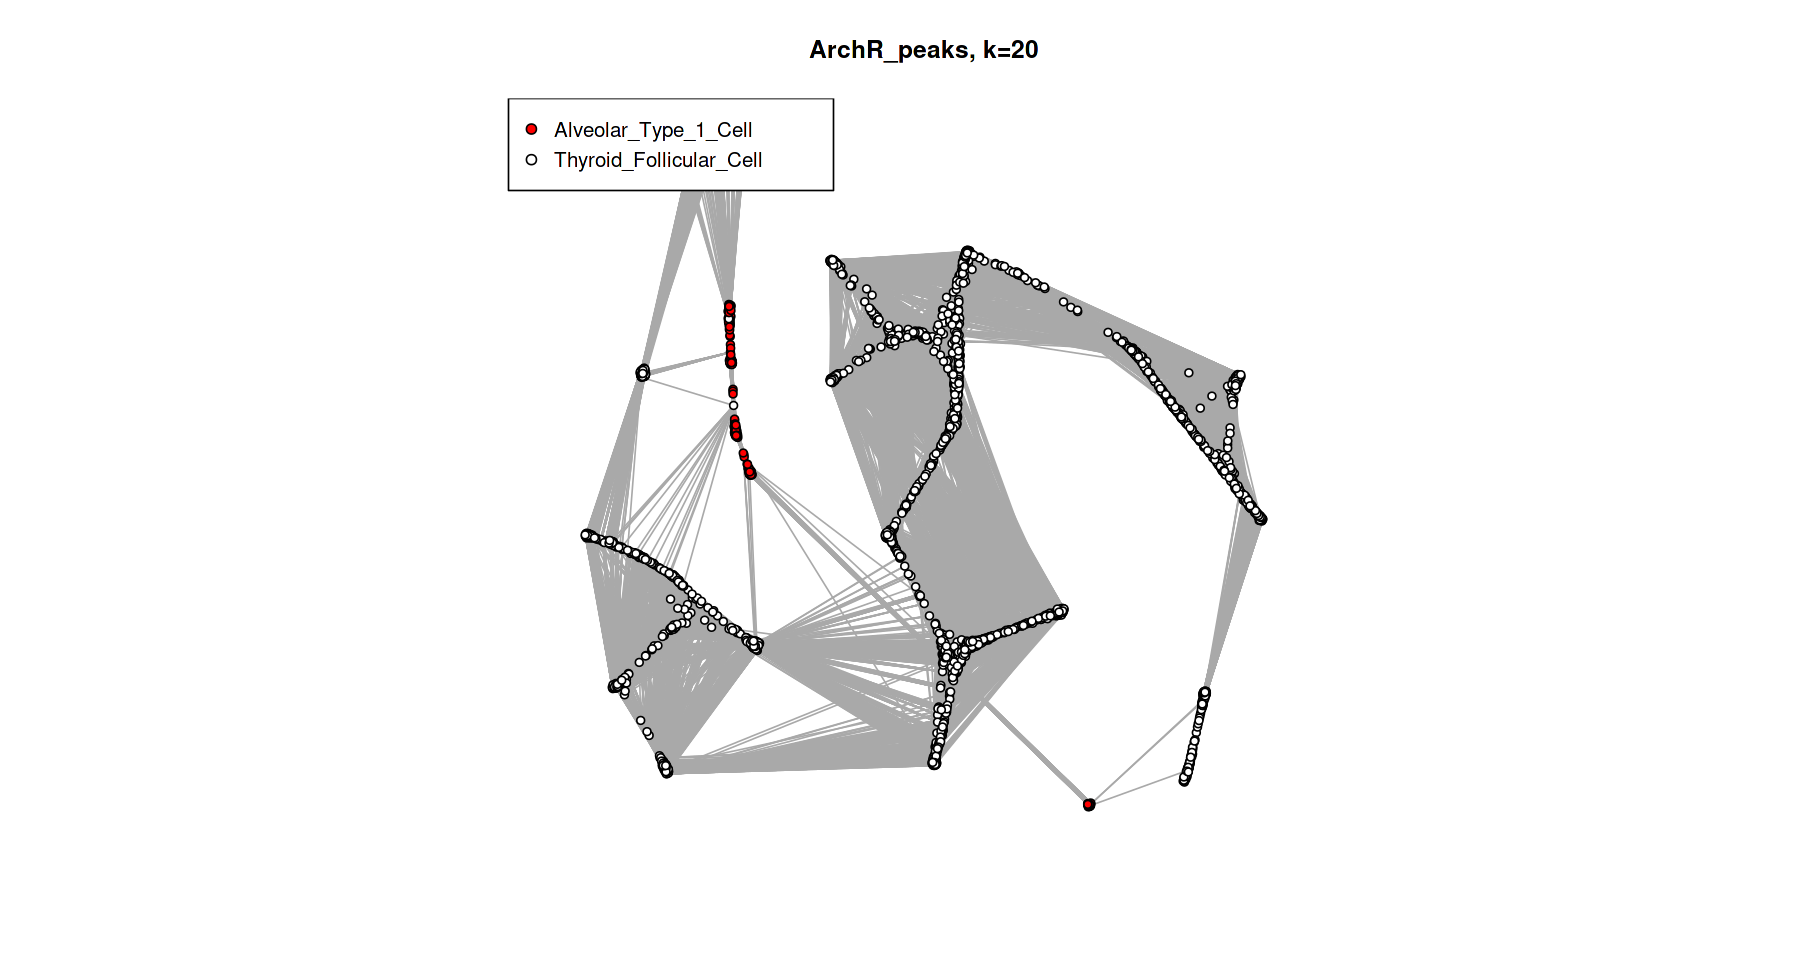

In [41]:
options(repr.plot.width=15, repr.plot.height=8)
plot_subgraph(sobj1, type1, type2, main="ArchR_peaks, k=20", graph_name="snn_ndim15")

* Error 1: Alveolar_Type_1_Cell vs Thyroid_Follicular_Cell: the connectivity and the UMAP is fine. This error might be resolved by using different random seed in Leiden, or changing the k in SNN. => Just increasing resoltion helps. This error is mainly caused by the "bridge cells". UMAP doesn't help.
* Error 2: Vascular_Smooth_Muscle_1 vs Smooth_Muscle_GE_Junction: the connectivity is bad, but the UMAP is fine. This error might be solved by changing k in SNN, or switch from SNN to UMAP graph. => Increasing k in SNN doesn't help, because there're too many "weak" cells.
* Error 3: Colonic_Goblet_Cell vs Small_Intestinal_Enterocyte: the connectivity and UMAP is bad. This error is more relevant to the feature engineering method.

In [47]:
options(repr.plot.width=25, repr.plot.height=6)
# decrease k of UMAP
ndim0 <- dim(sobj1@reductions[["learned_embedding"]])[2]
sobj1 <- RunUMAP(sobj1, 
            reduction = "learned_embedding",
            dims = 1:ndim0,
            n.neighbors = 20L,
            reduction.name = "umap_k20")
sobj1 <- RunUMAP(sobj1, 
        reduction = "learned_embedding",
        dims = 1:ndim0,
        n.neighbors = 10L,
        reduction.name = "umap_k10")
sobj1 <- RunUMAP(sobj1, 
        reduction = "learned_embedding",
        dims = 1:ndim0,
        n.neighbors = 5L,
        reduction.name = "umap_k5")

p1 <- Seurat::DimPlot(sobj1, reduction = "umap_k20", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_k20")) 
p2 <- Seurat::DimPlot(sobj1, reduction = "umap_k10", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_k10")) 
p3 <- Seurat::DimPlot(sobj1, reduction = "umap_k5", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_k5")) 

13:47:26 UMAP embedding parameters a = 0.9922 b = 1.112

13:47:26 Read 20204 rows and found 15 numeric columns

13:47:26 Using Annoy for neighbor search, n_neighbors = 20

13:47:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:47:28 Writing NN index file to temp file /media/siluo/c55ed6ce-672c-4a68-b60e-cef07edf5933/scratch/RtmpPcdgtd/file96c9258f24f69

13:47:28 Searching Annoy index using 1 thread, search_k = 2000

13:47:32 Annoy recall = 100%

13:47:33 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

13:47:34 Found 2 connected components, 
falling back to 'spca' initialization with init_sdev = 1

13:47:34 Using 'irlba' for PCA

13:47:34 PCA: 2 components explained 57.82% variance

13:47:34 Scaling init to sdev = 1

13:47:3

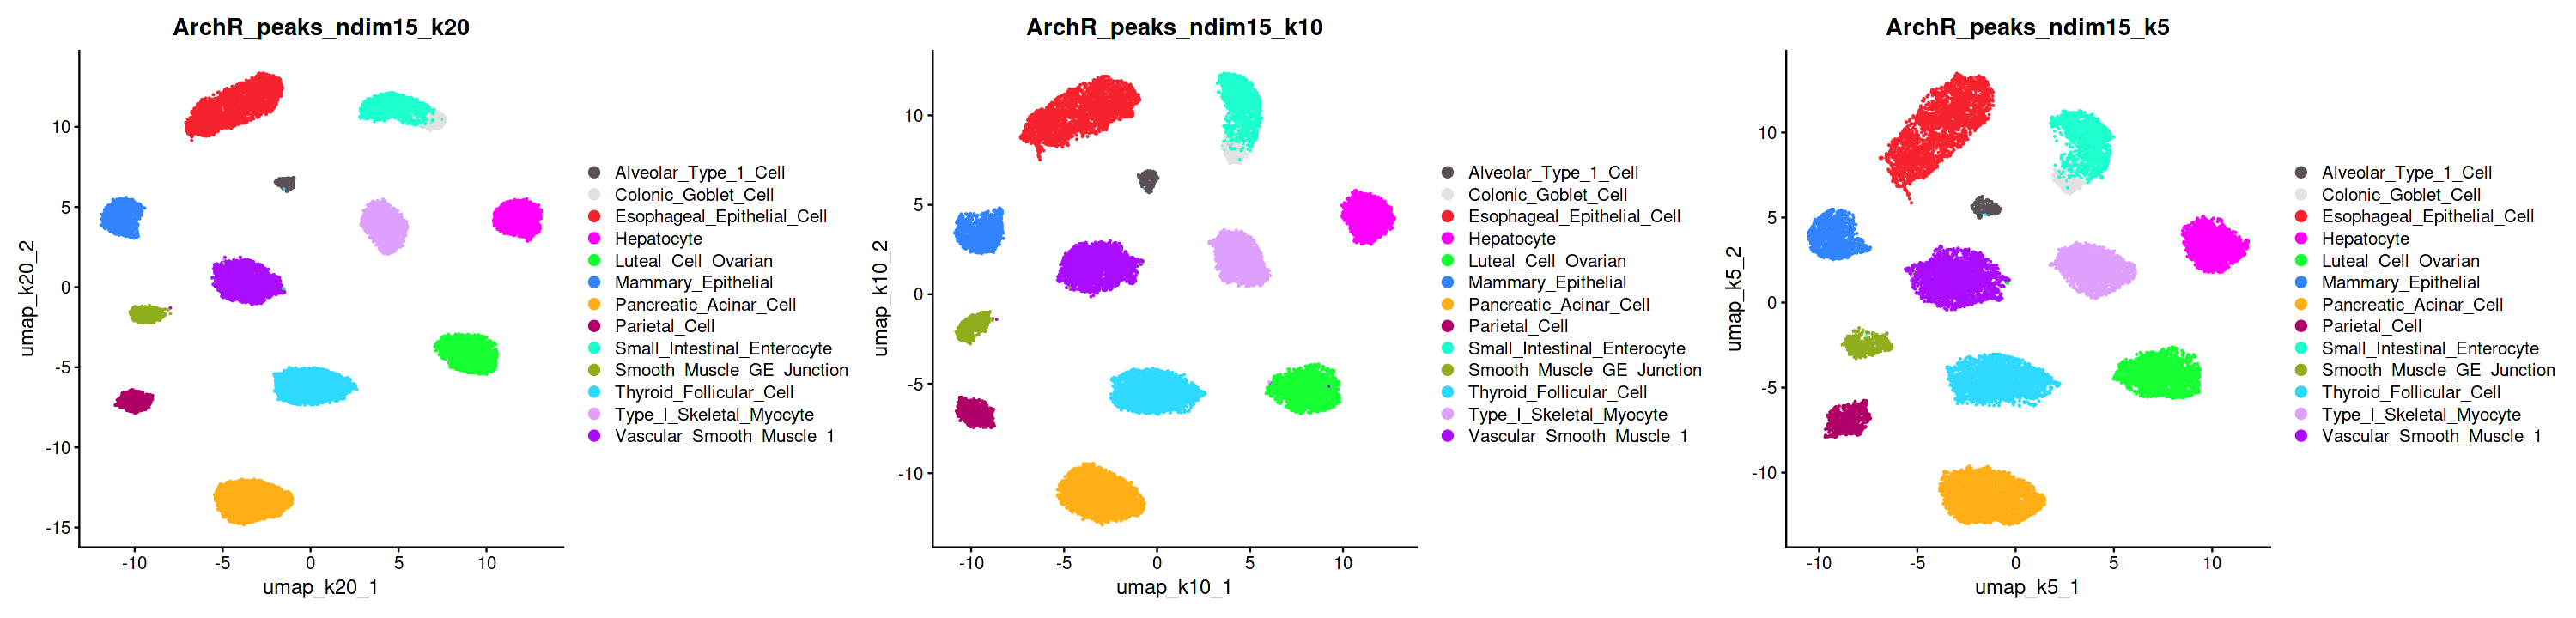

In [46]:
options(repr.plot.width=25, repr.plot.height=6)
p1 + p2 + p3

Decreasing k in UMAP do not mix cell groups together like in SNN. This supports the hypothesis that the graph construction in UMAP is better than SNN.

### How the graph connectivity will change as k changes?

In [ ]:
# graph connectivity
df_metrics_selected <- df_metrics_selected %>% filter(long_method=="ArchR_peaks")
graph_name <- paste0("snn_ndim", 15)
df_k <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c(), k=c())

for(k in c(5, 10, 15, 25, 30)){
    for(i in 1:dim(df_metrics_selected[1])){
        sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_selected$dataset2[i], "/", df_metrics_selected$snn_file[i])
        lm <- df_metrics_selected$long_method[i]
        dataset <- df_metrics_selected$dataset[i]
        sobj <- readRDS(sobj_file)
        name1 <- paste0("nn_ndim", n, "_k", k)
        name2 <- paste0("snn_ndim", n, "_k", k)
        sobj <- FindNeighbors(object = sobj, 
                                reduction = "learned_embedding", 
                                graph.name = c(name1, name2),
                                k.param = k)
        print(dataset)
        g <- sobj@graphs[[name2]]
        attributes(g)$class <- "dgCMatrix"
        graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
        label <- sobj$ground_truth
        label_ls <- unique(label)
        for(c in 1:length(label_ls)){
            print(c)
            res <- community_strength(graph, label, label_idx=c)
            df_k <- rbind(df_k, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset, k=k))
        }
    }
}

Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "human adult atlas subset1"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


In [ ]:
df_k

method,cell_type,weak_cells,weak_frac,dataset,k
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
ArchR_peaks,Pancreatic_Acinar_Cell,2,0.0006671114,human adult atlas subset1,5
ArchR_peaks,Esophageal_Epithelial_Cell,4,0.0015625000,human adult atlas subset1,5
ArchR_peaks,Small_Intestinal_Enterocyte,20,0.0155763240,human adult atlas subset1,5
ArchR_peaks,Vascular_Smooth_Muscle_1,27,0.0115236876,human adult atlas subset1,5
ArchR_peaks,Thyroid_Follicular_Cell,1,0.0003746722,human adult atlas subset1,5
ArchR_peaks,Luteal_Cell_Ovarian,2,0.0011235955,human adult atlas subset1,5
ArchR_peaks,Hepatocyte,2,0.0011682243,human adult atlas subset1,5
ArchR_peaks,Colonic_Goblet_Cell,18,0.0486486486,human adult atlas subset1,5
ArchR_peaks,Parietal_Cell,0,0.0000000000,human adult atlas subset1,5


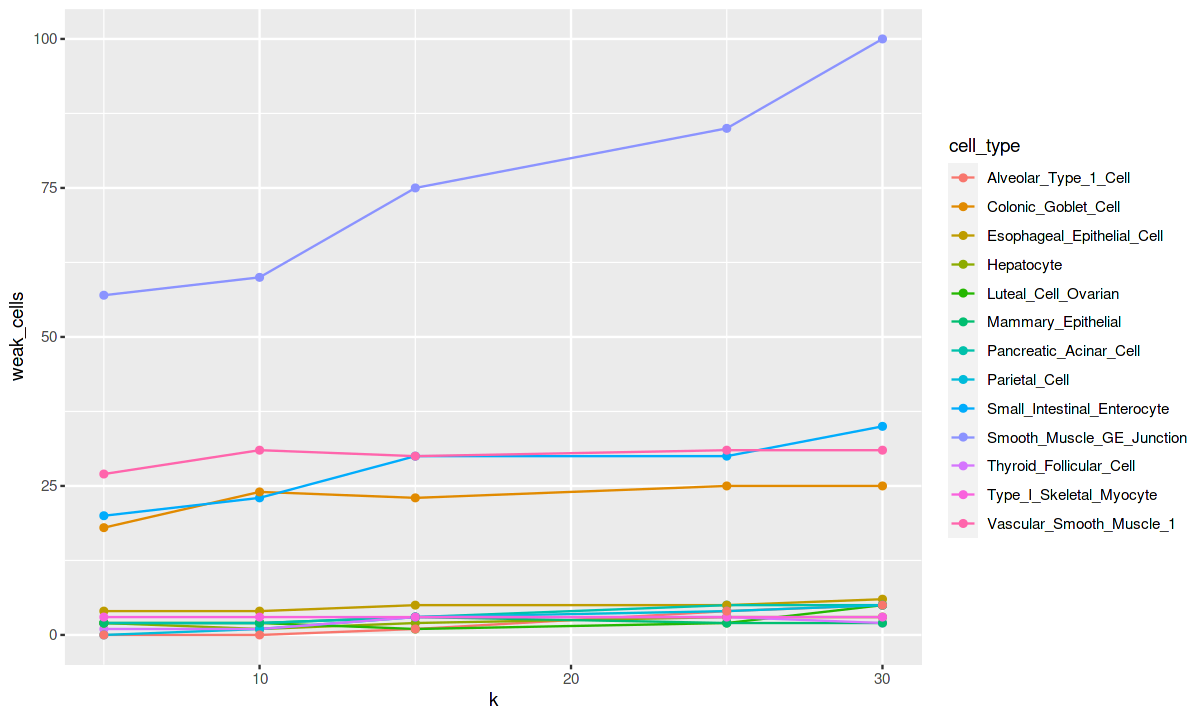

In [49]:
options(repr.plot.width=10, repr.plot.height=6)
df_k %>% ggplot(aes(k, weak_cells,  color = cell_type)) + 
        geom_line() + geom_point()

The change of k in SNN is not of large impact => might be because SNN is already smoothed.

### Will using graph method in UMAP help?

In [ ]:
embed <- Embeddings(Reductions(sobj1, "learned_embedding"))
g <- sobj1@graph[["snn_ndim15"]]

In [90]:
df_umap <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c(), k=c())
for(k in c(5, 10, 15, 20, 25, 30)){
    sim_graph_adj <- uwot::similarity_graph(embed, n_neighbors = k)
    colnames(sim_graph_adj) <- colnames(g)
    graph_umap <- graph_from_adjacency_matrix(adjmatrix = sim_graph_adj, mode = "undirected", weighted = TRUE, add.colnames = TRUE)

    label <- sobj1$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        print(c)
        res <- community_strength(graph_umap, label, label_idx=c)
        df_umap <- rbind(df_umap, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset, k=k))
    }
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


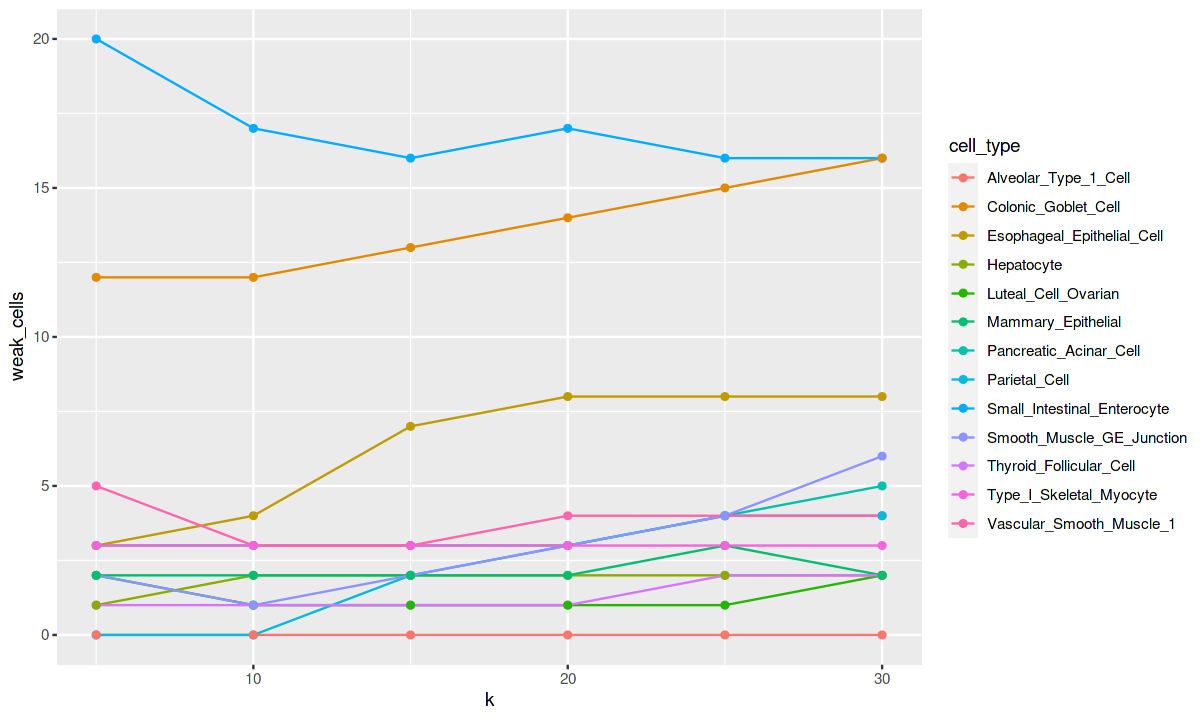

In [91]:
options(repr.plot.width=10, repr.plot.height=6)
df_umap %>% ggplot(aes(k, weak_cells,  color = cell_type)) + 
        geom_line() + geom_point()

How about clustering?

In [93]:
sim_graph_adj <- uwot::similarity_graph(embed, n_neighbors = 10)
colnames(sim_graph_adj) <- colnames(g)
rownames(sim_graph_adj) <- rownames(g)
sobj1@graphs[["umap_graph_k10"]] <- as.Graph(sim_graph_adj)

In [94]:
sobj1 <- FindClusters(object = sobj1, 
                    verbose = FALSE, 
                    algorithm = 4,
                    resolution = 0.15,
                    graph.name = "umap_graph_k10"
                    )

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.0 GiB”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to intege

: 

: 

In [ ]:
options(repr.plot.width=10, repr.plot.height=7.5)
cross_table_plot(ground_truth, sobj1$seurat_clusters, a=1.3, b=5.7, c=2, m=0, n=0.2)

# 10XPBMC

In [6]:
j <- 6
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

## Aggregation

In [7]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
7,ARI,0.6544769,aggregation,aggregation,default,500,default,15,0.05,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.05_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.05.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
9,ARI,0.7243036,aggregation,aggregation,default,500,default,15,0.10,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.1.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
10,ARI,0.6786102,aggregation,aggregation,default,500,default,15,0.15,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.15_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.15.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
11,ARI,0.6873782,aggregation,aggregation,default,500,default,15,0.25,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.25_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.25.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
13,ARI,0.7798700,aggregation,aggregation,default,500,default,15,0.35,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.35_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.35.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
14,ARI,0.6357575,aggregation,aggregation,default,500,default,15,0.40,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.4_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.4.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
15,ARI,0.5668242,aggregation,aggregation,default,500,default,15,0.60,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.6_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.6.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
16,ARI,0.5115219,aggregation,aggregation,default,500,default,15,0.70,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.7_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.7.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics
17,ARI,0.5038365,aggregation,aggregation,default,500,default,15,0.80,PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.8_evaluation.RDS,PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.8.tsv,PBMC_multiomics/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10X PBMC multiomics,15,PBMC_multiomics


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


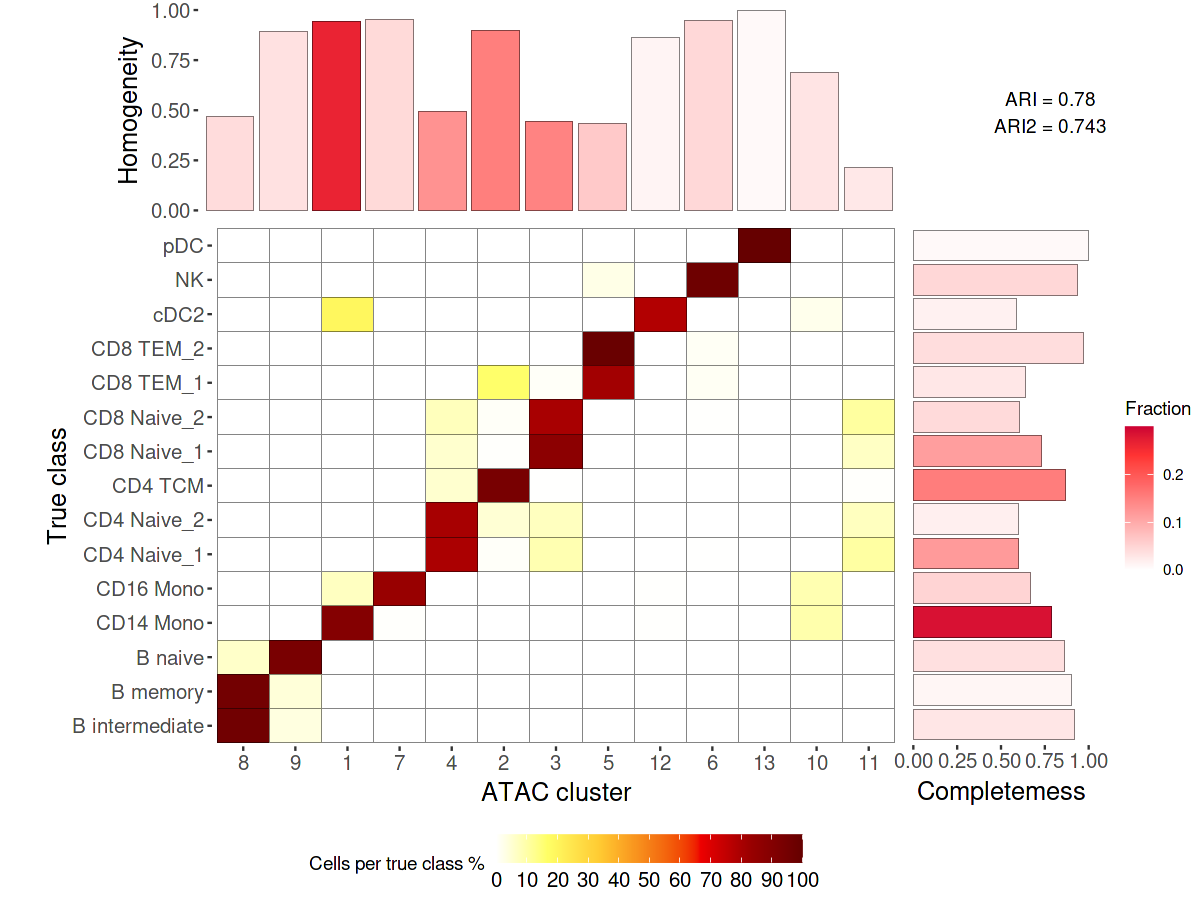

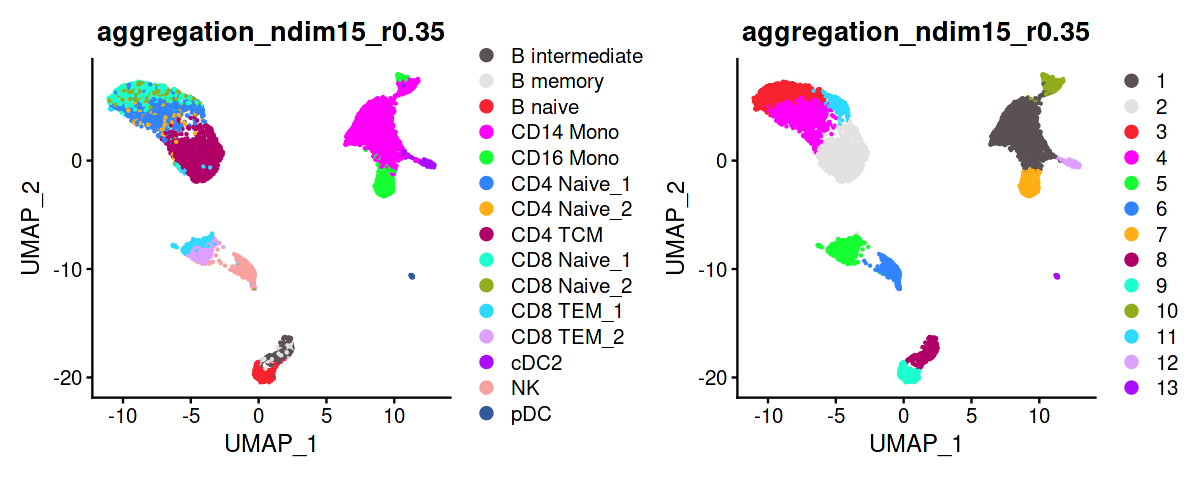

In [8]:
# check if the value of a,b,c is appropriate
i <- 5
method <- df_method$method[i]
resolution<- df_method$resolution[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2.5, c=2, m=0, n=0.3)
p2 <- Seurat::DimPlot(sobj1, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_r", resolution)) 
p3 <- Seurat::DimPlot(sobj2, reduction = "umap", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(long_method,"_ndim",n, "_r", resolution)) 
options(repr.plot.width=10, repr.plot.height=7.5)
p1 
options(repr.plot.width=10, repr.plot.height=4)
p2 + p3

In [66]:
df_metrics_selected <- df_metrics_sub[as.logical(df_metrics_sub$metric %in% c("ARI")),]
df_metrics_selected <- df_metrics_selected %>% filter(ndim == 15) %>% filter(resolution == 0.35) %>% filter(long_method == "aggregation")

In [61]:
# graph connectivity
graph_name <- paste0("snn_ndim", 15)
df_g <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c())

for(i in 1:dim(df_metrics_selected[1])){
    sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_selected$dataset2[i], "/", df_metrics_selected$snn_file[i])
    lm <- df_metrics_selected$long_method[i]
    dataset <- df_metrics_selected$dataset[i]
    sobj <- readRDS(sobj_file)
    print(dataset)
    g <- sobj@graphs[[graph_name]]
    attributes(g)$class <- "dgCMatrix"
    graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
    label <- sobj$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        print(c)
        res <- community_strength(graph, label, label_idx=c)
        df_g <- rbind(df_g, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset))
    }
}

Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”


[1] "10X PBMC multiomics"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


In [62]:
df_g

method,cell_type,weak_cells,weak_frac,dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>
aggregation,CD8 TEM_2,18,0.052478134,10X PBMC multiomics
aggregation,CD4 TCM,24,0.018195603,10X PBMC multiomics
aggregation,CD14 Mono,16,0.006530612,10X PBMC multiomics
aggregation,CD8 Naive_1,67,0.068367347,10X PBMC multiomics
aggregation,CD4 Naive_2,129,0.786585366,10X PBMC multiomics
aggregation,CD16 Mono,16,0.036613272,10X PBMC multiomics
aggregation,CD4 Naive_1,81,0.079567780,10X PBMC multiomics
aggregation,CD8 TEM_1,34,0.142259414,10X PBMC multiomics
aggregation,NK,8,0.020000000,10X PBMC multiomics


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "10X PBMC multiomics"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "10X PBMC multiomics"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "10X PBMC multiomics"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "10X PBMC multiomics"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”
Computing nearest neighbor graph

Computing SNN



[1] "10X PBMC multiomics"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


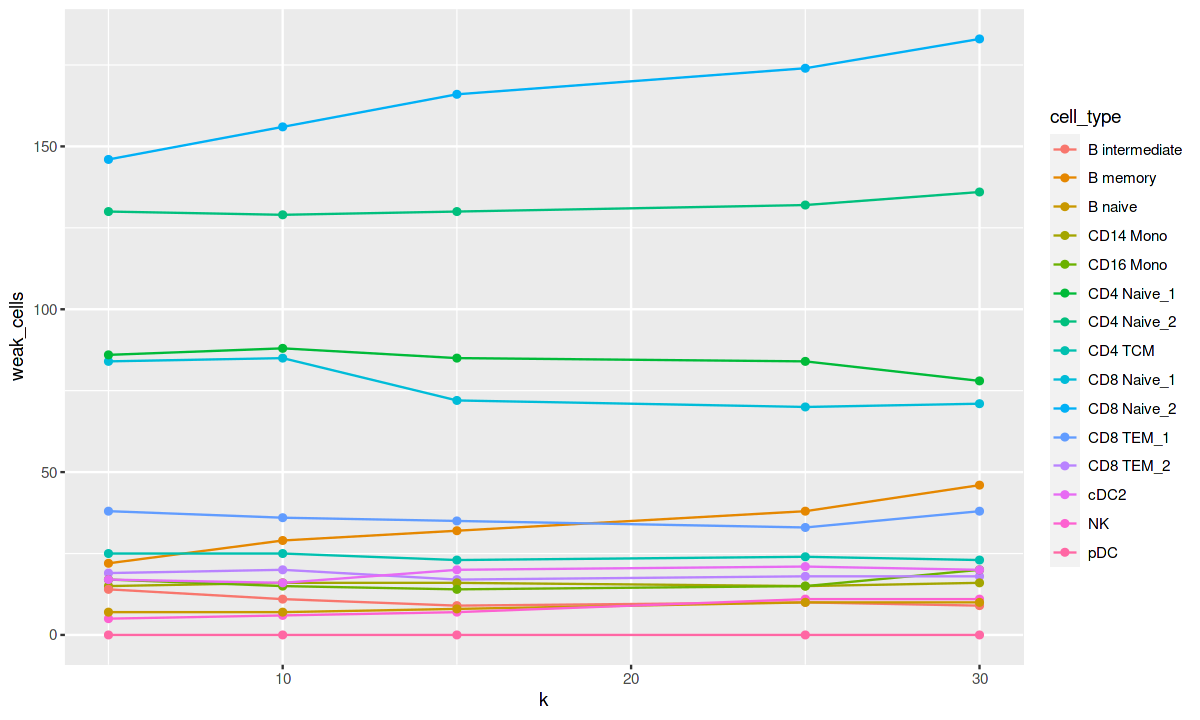

In [67]:
# graph connectivity
graph_name <- paste0("snn_ndim", 15)
df_k2 <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c(), k=c())

for(k in c(5, 10, 15, 25, 30)){
    for(i in 1:dim(df_metrics_selected[1])){
        sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_selected$dataset2[i], "/", df_metrics_selected$snn_file[i])
        lm <- df_metrics_selected$long_method[i]
        dataset <- df_metrics_selected$dataset[i]
        sobj <- readRDS(sobj_file)
        name1 <- paste0("nn_ndim", n, "_k", k)
        name2 <- paste0("snn_ndim", n, "_k", k)
        sobj <- FindNeighbors(object = sobj, 
                                reduction = "learned_embedding", 
                                graph.name = c(name1, name2),
                                k.param = k)
        print(dataset)
        g <- sobj@graphs[[name2]]
        attributes(g)$class <- "dgCMatrix"
        graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
        label <- sobj$ground_truth
        label_ls <- unique(label)
        for(c in 1:length(label_ls)){
            print(c)
            res <- community_strength(graph, label, label_idx=c)
            df_k2 <- rbind(df_k2, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset, k=k))
        }
    }
}
options(repr.plot.width=10, repr.plot.height=6)
df_k2 %>% ggplot(aes(k, weak_cells,  color = cell_type)) + 
        geom_line() + geom_point()

In [22]:
embed <- Embeddings(Reductions(sobj1, "learned_embedding"))
g <- sobj1@graphs[["snn_ndim15"]]
lm <- "aggregation"

In [23]:
df_umap <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c(), k=c())
for(k in c(5, 10, 15, 20, 25, 30)){
    sim_graph_adj <- uwot::similarity_graph(embed, n_neighbors = k)
    colnames(sim_graph_adj) <- colnames(g)
    graph_umap <- graph_from_adjacency_matrix(adjmatrix = sim_graph_adj, mode = "undirected", weighted = TRUE, add.colnames = TRUE)

    label <- sobj1$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        print(c)
        res <- community_strength(graph_umap, label, label_idx=c)
        df_umap <- rbind(df_umap, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset, k=k))
    }
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


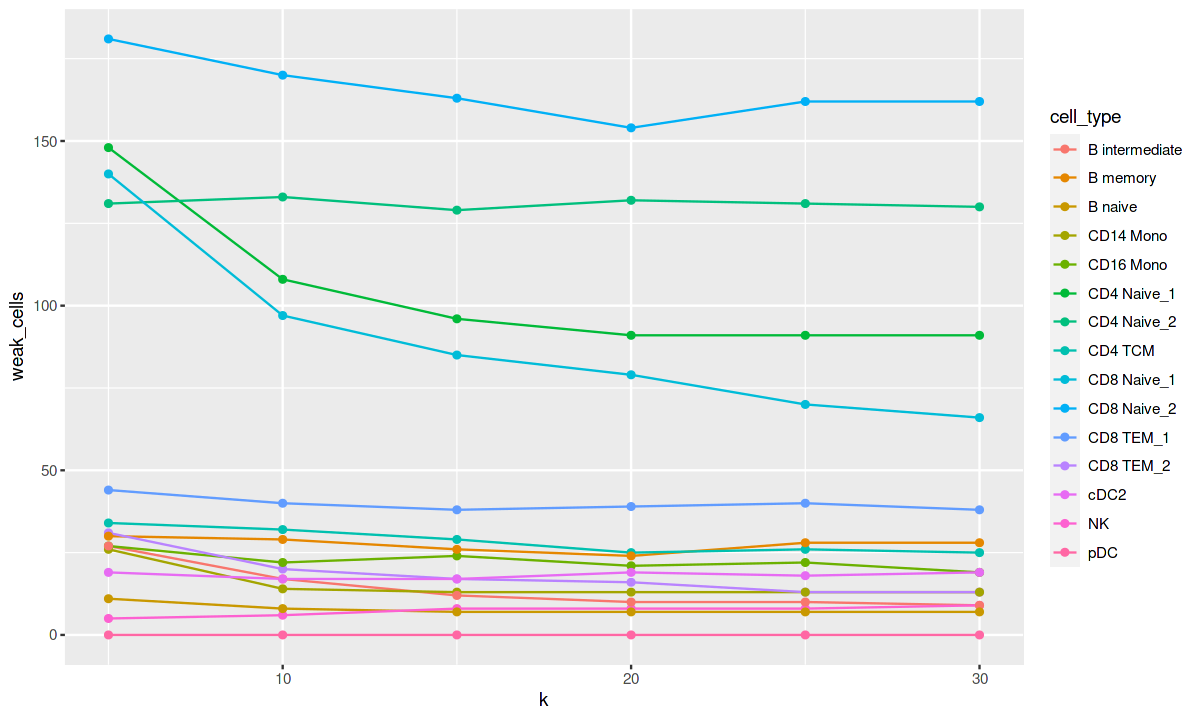

In [26]:
options(repr.plot.width=10, repr.plot.height=6)
df_umap %>% ggplot(aes(k, weak_cells,  color = cell_type)) + 
        geom_line() + geom_point()

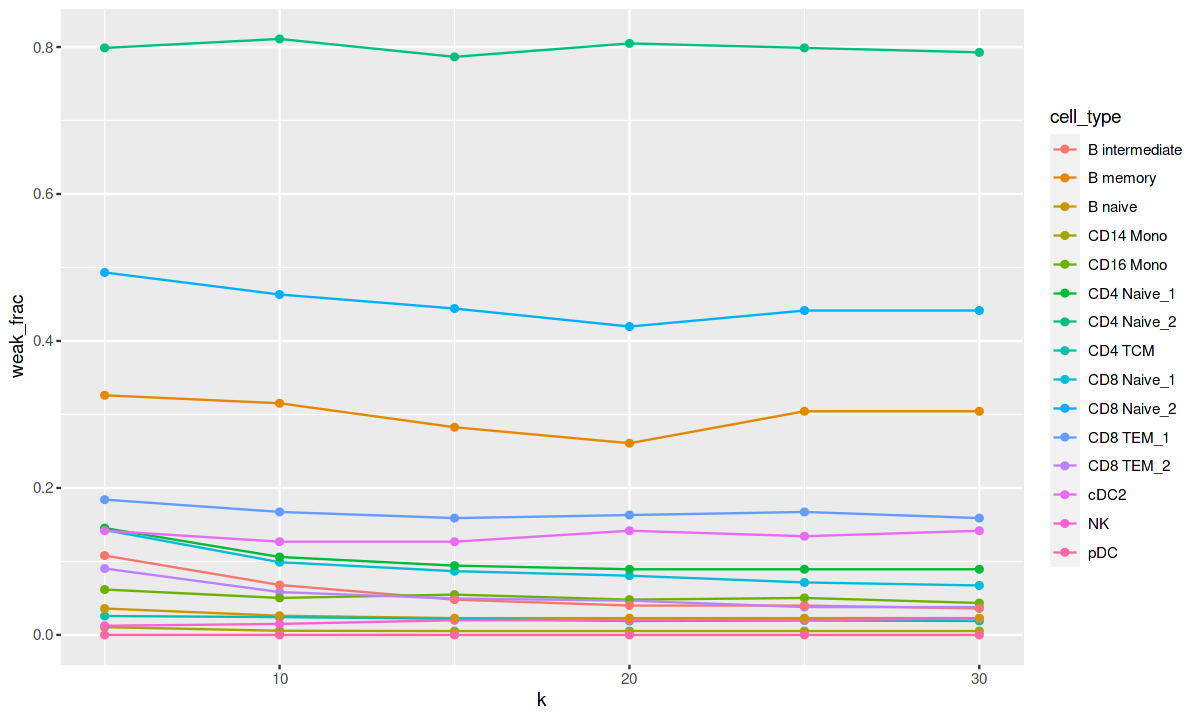

In [27]:
options(repr.plot.width=10, repr.plot.height=6)
df_umap %>% ggplot(aes(k, weak_frac,  color = cell_type)) + 
        geom_line() + geom_point()